Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

16) Quais são os principais motivos de descarte? 
Qual valor total de descarte? Qual período com maior descarte? 
Qual sexo é mais descartado? 

Hipótese: 

IMPORTANDO MINHAS BIBLIOTECAS:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re as re

CRIANDO UMA DATAFRAME E FILTRANDO DADOS QUE NÃO FAZEM PARTE DA ANÁLISE E ALTERANDO AS DATAS.

In [2]:
#Filtros para trabalhar com os dados da minha dataframe original

descarte = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
            #& (descarte['num_sex_m'] != 666)
            #& (descarte['num_sex_f'] != 666)
            & (descarte ['m_f'] != 'AAA')
                   ]


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


ANALISANDO ALGUNS DADOS DA MINHA DATAFRAME ORIGINAL

In [3]:
#verificando a quantidade de entradas 'Descarte Zootécnico da série 'obs_desc'
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

919

In [4]:
#não lembro desse código. - perguntar pro Guilherme e ver se posso apagar.
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [5]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

922

In [6]:
#verificando informações da dataframe inicial - 1944 entradas ao todo.
descarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         1944 non-null datetime64[ns]
user              1942 non-null object
ling              1944 non-null object
num_ani           1944 non-null int64
m_f               1944 non-null object
date_nasc         1944 non-null datetime64[ns]
id_orig           1944 non-null object
util              1944 non-null object
id_solic          1944 non-null int64
data_inicio       1944 non-null datetime64[ns]
time              1944 non-null object
total_time        1944 non-null int64
doses             1944 non-null int64
data_solic        1944 non-null int64
data_forn         1944 non-null int64
data_fim          1944 non-null int64
num_m             1944 non-null int64
num_f             1944 non-null int64
date_acas         1944 non-null datetime64[ns]
date_nasc_acas    1944 non-null datetime64[ns]
num_nasc          1944 non-null int64
date_sex          1944 non-null datetime64

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENAÇÕES DE MOTIVOS - 10% COM MAIS EVENTOS // 90% dos meus dados

In [7]:
#Replace erro de cadastro
erro = descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx', 'não foi achado animal'), 'Erro de cadastro', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [8]:
#Replace fornecido zoológico
zoo = descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [9]:
#Replace velhos
velhos = descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [10]:
#Replace Descarte zootécnico
descart_zoo = descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [11]:
#Replace monitoramento sanitário
monitoramento = descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento', 'Monitoramento Sanitátio',
                                             'Monitoramento Sanitátio', 'Controle Sanitário'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [12]:
#Replace excesso de filhotes
ex_filho = descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [13]:
#Replace para acasalamento
acasa = descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento','Para Acasalamentos', 'Acasalamento Derivação Cesariana'
                            'Acasalamento Cesárea', 'Acasalamento Cesárea', 'Para acasal', 'ACASAL'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [14]:
#Replace exp lorena
lorena = descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [15]:
#Replace ninhada grande
ninhada_g = descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [16]:
#Replace transferencia caixa
test_lista = ['nao estavam na cx', 'Transferido para a cx 526141', 'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx', 'Trocado de cx']
trans_cx = descarte['obs_desc'].replace(test_lista, 'Transferencia cx', inplace=True)
trans_cx

In [17]:
#Replace canibalismo
caniba = descarte['obs_desc'].replace('Fêmea comeu filhotes', 'Canibalismo',inplace=True)

In [18]:
#lista com 10% das observações com maior numero de animais; 90% dos dados
lista_10por_super = list(descarte['obs_desc'].value_counts()[:21].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Velhos',
 'Fornecido Zoológico',
 'Para acasalamento',
 'Erro de cadastro',
 'Encontrado Morto',
 'UEL',
 'Mudança',
 'Animais Doentes',
 'Cascavel',
 'Troca de Macho',
 'Transferencia cx',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Exp Lorena',
 '.',
 'Fornecimento Guilhermina - Sem número do comitê de Ética',
 'Fornecimento Recife - Sem número do comitê de Ética',
 'Erro Experimento',
 'Monitoramento Sanitátio']

In [19]:
#lista com observações inferiores aos 10%
lista_10por_infer = list(descarte['obs_desc'].value_counts()[21:].index)
lista_10por_infer[:10]

['Troca de Fêmea',
 'TCC João',
 'nan',
 'Presenca de fungo na caixa.',
 'Teste BioterC',
 'Teste',
 'briga',
 'Acasalamento Derivação Cesariana',
 'Exp João',
 'Acasalados para formar grupo E']

Criada lista que vai receber todos os termos com condições;


In [20]:
#Lista com termos para pesquisa, sem a primera e ultima letra
lista_termos_pesq = list()
for i in lista_10por_super: #laço para que percorra na lista e itere em i
#     print(i)
    obs = i.split(' ') #uma nova variavel vai receber o que tem em i e separar pelos espaços
    for j in obs:      #novo laço que vai percorrer em obs e guardar em j
        if len(j) > 3: #condição para que os termos sejam maiores que 3 letras
            if len(j) > 4: #condição para seja maior que 4
                lista_termos_pesq.append(j[1:-1]) #append= adicionando essas informações na lista_termos_pesq e que retire a primeira e ultima letra 
            else:
                lista_termos_pesq.append(j[1:]) #se não só a primera.
lista_termos_pesq

['escart',
 'ootécnic',
 'xperiment',
 'elho',
 'ornecid',
 'oológic',
 'ara',
 'casalament',
 'rro',
 'adastr',
 'ncontrad',
 'ort',
 'udanç',
 'nimai',
 'oente',
 'ascave',
 'roc',
 'ach',
 'ransferenci',
 'onitorament',
 'anitári',
 'vermectin',
 'oren',
 'orneciment',
 'uilhermin',
 'úmer',
 'omit',
 'tic',
 'orneciment',
 'ecif',
 'úmer',
 'omit',
 'tic',
 'rro',
 'xperiment',
 'onitorament',
 'anitáti']

In [21]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.

termos_repetidos = dict() #criado dicionario pra armazenar os motivos e as repetições dos seus termos;

for i in lista_termos_pesq:
    lista_resol = list(descarte[descarte['obs_desc'].str.contains(i, regex=False).astype('bool')]['obs_desc'].value_counts().index)
    termos_repetidos[i] = lista_resol
# for i, j in enumerate(termos_repetidos['escart']):
# #     print(j)
#         if i != 2:
#             print(j)
termos_repetidos

{'escart': ['Descarte Zootécnico',
  'Descarte',
  'Descarte por idade',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.'],
 'ootécnic': ['Descarte Zootécnico'],
 'xperiment': ['Fim Experimento',
  'Erro Experimento',
  'Fornecido para experimento do Henrique',
  'experimentos',
  'fornecido para experimento',
  'Fornecidos Experimento Pré Imune Reagente',
  'Fornecido Para Experimento Bruno',
  'Fornecida experimento 182 / Juliano',
  'Fornecidos para experimento',
  'experimento Camila',
  'Fornecido para Experimento',
  'para experimento',
  'experimento',
  'Abandono de Experimento',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.'],
 'elho': ['Velhos'],
 'ornecid': ['Fornecido Zoológi

In [22]:
#replace descarte zootécnico - outro formato
descarte_z = descarte['obs_desc'].replace(termos_repetidos['escart'], 'Descarte Zootécnico', inplace=True)
descarte_z

In [23]:
#replace encontrado morto
morto = descarte['obs_desc'].replace(termos_repetidos['ort'], 'Encontrado Morto', inplace=True)
morto

In [24]:
#replace animais doentes
animais_doentes = descarte['obs_desc'].replace(termos_repetidos['oente'], 'Animais Doentes', inplace=True)
animais_doentes

In [25]:
#o que tiver em lista_termos_pesq coloque em i e faça isso:
for i in lista_termos_pesq:
    descarte['obs_desc'].replace(termos_repetidos[i], 'Descarte Zootécnico', inplace=True)
#     print(termos_repetidos[i])
    break

FIM DAS CONCATENAÇÕES DOS 10% SUPERIORES

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CONCATENANDO LINHAGENS - DATAFRAME ORIGINAL

In [26]:
descarte['ling'].value_counts()

Balb/c         468
S129KO         274
C57BL/6        215
C3H            152
129/SV-E       111
S129WT          88
Swiss-1 A       56
Swiss-1 B       53
Swiss-2 C       46
C57BL06WT       43
Swiss-2 D       41
Swiss-1 D       41
Swiss-2 B       41
Swiss-2 E       37
Swiss-1 C       36
Swiss-1 E       33
Swiss-2 A       31
Swiss C         28
Swiss E         25
Swiss D         25
Swiss A         24
Swiss B         23
DBA/1J          20
 S129WT         13
AG129            9
 S129KO          5
Swiss/CFW B      2
Swiss/CFW        1
Swiss-2 A        1
Swiss/CFW D      1
Swiss/CFW C      1
Name: ling, dtype: int64

In [27]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

descarte['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#descarte[(descarte['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

descarte['ling'].replace(' S129KO', 'S129KO', inplace=True)
#descarte[(descarte['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

descarte['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#descarte[(descarte['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

descarte['ling'].replace(['Swiss A','Swiss/CFW'], 'Swiss-1 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

descarte['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

descarte['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

descarte['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

descarte['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

descarte['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#descarte[(descarte['ling'] == 'Swiss-1 E')].info()

In [28]:
descarte['ling'].value_counts()

Balb/c       468
S129KO       279
C57BL/6      258
129/SV-E     212
C3H          152
Swiss-1 A     81
Swiss-1 B     78
Swiss-1 D     67
Swiss-1 C     65
Swiss-1 E     58
Swiss-2 C     46
Swiss-2 D     41
Swiss-2 B     41
Swiss-2 E     37
Swiss-2 A     32
DBA/1J        20
AG129          9
Name: ling, dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CRIANDO UMA UNICA INSTÂNCIA --OUTROS-- PARA RESPONDER CADA PERGUNTA

In [29]:
#Lista que vai guardar meus 90% dos dados a serem analisados

lista_10por_super = list(descarte['obs_desc'].value_counts()[:18].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Velhos',
 'Fornecido Zoológico',
 'Para acasalamento',
 'Erro de cadastro',
 'Encontrado Morto',
 'UEL',
 'Mudança',
 'Animais Doentes',
 'Cascavel',
 'Troca de Macho',
 'Transferencia cx',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Exp Lorena',
 '.',
 'Fornecimento Guilhermina - Sem número do comitê de Ética']

In [50]:
#Nova DataFrame criada com os 90% dos motivos de descarte - DataFrame definitiva 
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #Essa função faz uma busca do que eu tenho na minha lista dentro da minha nova dataframe

descarte_filtrada.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss-1 B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootécnico,I
95,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
96,2014-09-17 13:14:12,Tania,129/SV-E,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Transferencia cx,AAA
97,2014-09-17 13:14:12,Tania,129/SV-E,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
98,2014-09-17 13:14:12,Tania,129/SV-E,3,f,2014-07-28 04:00:00,70,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Transferencia cx,AAA


In [52]:
descarte_filtrada = descarte_filtrada['num_ani'].groupby('ling')
descarte_filtrada.sum()


KeyError: 'ling'

In [31]:
#testando se as linhagens concatenadas estão na minha nova DataFrame.
descarte_filtrada['ling'].value_counts()

Balb/c       417
S129KO       273
C57BL/6      237
129/SV-E     206
C3H          139
Swiss-1 B     74
Swiss-1 A     74
Swiss-1 D     61
Swiss-1 C     56
Swiss-1 E     53
Swiss-2 D     40
Swiss-2 C     40
Swiss-2 E     35
Swiss-2 B     32
Swiss-2 A     29
DBA/1J        20
AG129          7
Name: ling, dtype: int64

In [32]:
#DataFrame 10% dos dados - que pegarei todas as informações e foi transformada em uma unica instância.

descarte_filtrada_10inf = descarte[descarte['obs_desc'].isin(lista_10por_infer)]

descarte_filtrada_10inf.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
73,2014-09-02 12:20:36,Tania,Swiss-1 B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
161,2014-10-01 12:37:47,Tania,Swiss-1 A,4,m,2014-06-10 00:00:00,145,desc,6,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Teste,AAA
162,2014-10-01 12:42:40,Tania,Balb/c,20,f,2014-06-10 00:00:00,158,desc,1,2014-11-05 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,20,0,Teste,AAA
248,2014-10-03 17:14:44,Tania,S129KO,4,m,2014-06-24 00:00:00,102,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,2,experimento,AAA
263,2014-10-06 18:27:59,Tania,Balb/c,6,f,2014-08-22 00:00:00,140,desc,7,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,6,4,nan,AAA


In [33]:
descarte_filtrada_10inf['ling'].value_counts()

Balb/c       46
C57BL/6      19
C3H          12
Swiss-2 B     7
S129KO        6
Swiss-1 A     6
Swiss-2 C     5
Swiss-1 C     5
Swiss-1 D     4
Swiss-1 B     4
Swiss-2 A     3
129/SV-E      3
Swiss-1 E     3
Swiss-2 E     2
AG129         2
Name: ling, dtype: int64

PERGUNTA 1 - QUAL NUMERO TOTAL DE ANIMAIS DESCARTADOS POR MOTIVO DE DESCARTE?

In [34]:
#Criando a unica instância com todas as informações a partir da DataFrame dos 10% inferiores.

#Soma total de animais
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)] #zerando a dataframe
outros_numtotal = descarte_filtrada_10inf.iloc[0] #buscando a posição 0 na minha dataframe e guardando numa variável do tipo série
outros_numtotal['num_ani'] = descarte_filtrada_10inf['num_ani'].sum() #somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_numtotal['obs_desc'] = 'Outros' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_numtotal['m_f'] = 'nao'
descarte_filtrada = descarte_filtrada.append(outros_numtotal) #Adicionando nova instância na dataframe 90%.
descarte_filtrada.tail() 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,407,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros,I


In [35]:
#Verificando se a nova instância está na minha DataFrame e se permanece unica (Sem repetições)
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         1794 non-null datetime64[ns]
user              1792 non-null object
ling              1794 non-null object
num_ani           1794 non-null int64
m_f               1794 non-null object
date_nasc         1794 non-null datetime64[ns]
id_orig           1794 non-null object
util              1794 non-null object
id_solic          1794 non-null int64
data_inicio       1794 non-null datetime64[ns]
time              1794 non-null object
total_time        1794 non-null int64
doses             1794 non-null int64
data_solic        1794 non-null int64
data_forn         1794 non-null int64
data_fim          1794 non-null int64
num_m             1794 non-null int64
num_f             1794 non-null int64
date_acas         1794 non-null datetime64[ns]
date_nasc_acas    1794 non-null datetime64[ns]
num_nasc          1794 non-null int64
date_sex          1794 non-null datetime64[ns

GERANDO GRÁFICO A PARTIR DA PERGUNTA 1

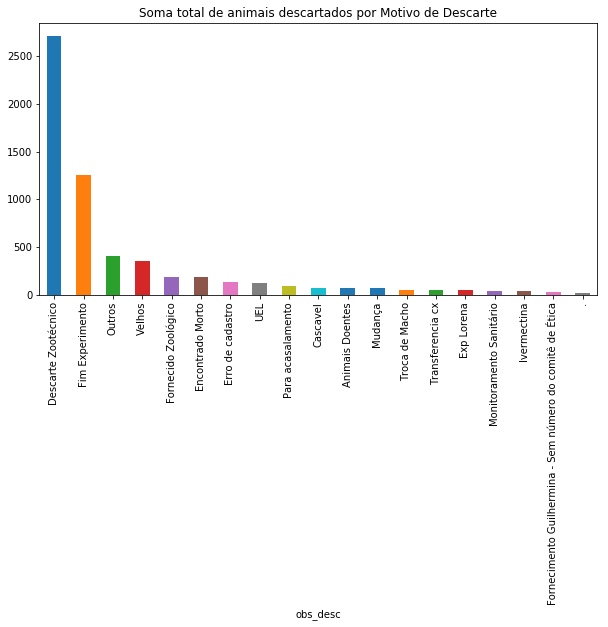

In [36]:
#testando grafico do numero total de animais.

plt.figure(figsize=(10,5))
plt.title('Soma total de animais descartados por Motivo de Descarte')

plot_total_animais = descarte_filtrada.groupby('obs_desc')
plot_total_animais['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)

PERGUNTA 2 - QUAL É O NUMERO TOTAL DE MACHOS DESCARTADOS POR MOTIVO DE DESCARTE?

In [37]:
term = 'm'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outr_m = descarte_filtrada_10inf.iloc[0]
outr_m['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
outr_m['obs_desc'] = 'Outros Machos'
outr_m['m_f'] = term
descarte_filtrada = descarte_filtrada.append(outr_m)
#descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,179,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Machos,I


In [38]:
#conferindo se a instância está na minha dataframe e se não há repetições.
descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         1794 non-null datetime64[ns]
user              1792 non-null object
ling              1794 non-null object
num_ani           1794 non-null int64
m_f               1794 non-null object
date_nasc         1794 non-null datetime64[ns]
id_orig           1794 non-null object
util              1794 non-null object
id_solic          1794 non-null int64
data_inicio       1794 non-null datetime64[ns]
time              1794 non-null object
total_time        1794 non-null int64
doses             1794 non-null int64
data_solic        1794 non-null int64
data_forn         1794 non-null int64
data_fim          1794 non-null int64
num_m             1794 non-null int64
num_f             1794 non-null int64
date_acas         1794 non-null datetime64[ns]
date_nasc_acas    1794 non-null datetime64[ns]
num_nasc          1794 non-null int64
date_sex          1794 non-null datetime64[ns

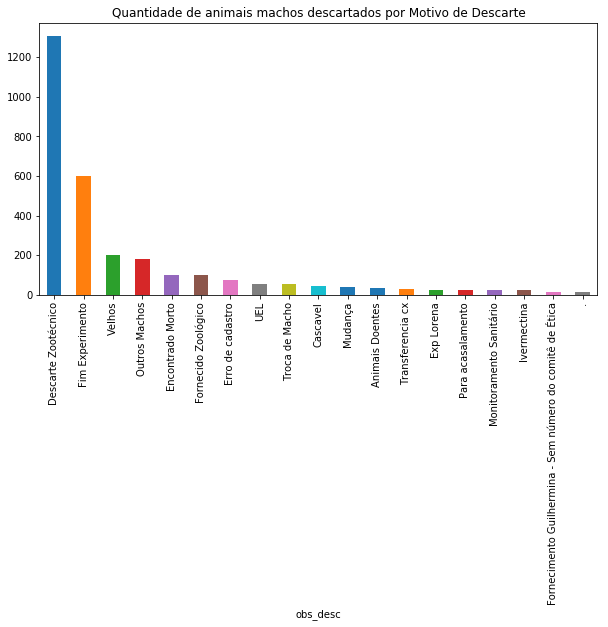

In [39]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de animais machos descartados por Motivo de Descarte')

plot_machos = descarte_filtrada[descarte_filtrada['m_f'] == 'm'].groupby('obs_desc')
plot_machos['num_ani'].sum().sort_values(ascending=False).plot(kind='bar')

PERGUNTA 3 - QUAL O NUMERO TOTAL DE FÊMEAS DESCARTADAS POR MOTIVOS DE DESCARTE?

In [40]:
term = 'f'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outr_f = descarte_filtrada_10inf.iloc[0]
outr_f['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == term]['num_ani'].sum()
outr_f['obs_desc'] = 'Outros Fêmeas'
outr_f['m_f'] = term
descarte_filtrada = descarte_filtrada.append(outr_f)
#descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
descarte_filtrada.tail()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss-1 B,228,f,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros Fêmeas,I


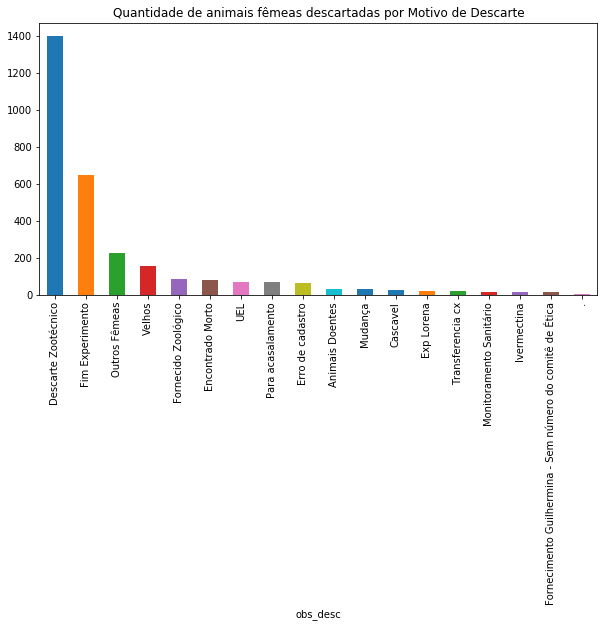

In [41]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de animais fêmeas descartadas por Motivo de Descarte')

plot_femeas = descarte_filtrada[descarte_filtrada['m_f'] == 'f'].groupby('obs_desc')

plot_femeas['num_ani'].sum().sort_values(ascending=False).plot(kind='bar')

PERGUNTA 4 - QUAL LINHAGEM MAIS DESCARTADA POR MOTIVO DE DESCARTE?

In [45]:
descarte_filtrada['ling'].value_counts()

Balb/c       417
S129KO       273
C57BL/6      237
129/SV-E     206
C3H          139
Swiss-1 B     75
Swiss-1 A     74
Swiss-1 D     61
Swiss-1 C     56
Swiss-1 E     53
Swiss-2 D     40
Swiss-2 C     40
Swiss-2 E     35
Swiss-2 B     32
Swiss-2 A     29
DBA/1J        20
AG129          7
Name: ling, dtype: int64

In [ ]:
#juntar por grupo isogênico e heterogênico nos 10% pra incluir no  
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 D','Swiss-2 C','Swiss-2 D','Swiss-2 E',]    

In [ ]:
# ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

# descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
# outr_iso = descarte_filtrada_10inf.iloc[0]
# outr_iso['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'] == ling_iso]['num_ani'].sum()
# outr_iso['obs_desc'] = 'Outros Linhagens Isogênicas'
# #outr_f['m_f'] = term
# descarte_filtrada = descarte_filtrada.append(outr_iso)
# #descarte_filtrada[descarte_filtrada['m_f'] == term]['num_ani'].sum()
# descarte_filtrada.tail()

A CADA LINHAGEM

In [ ]:
#'Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129'//'Swiss-1 A','Swiss-2 A'
ling = 'S129KO'
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]
outros_ling = descarte_filtrada_10inf.iloc[0] 
outros_ling['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'] == ling]['num_ani'].sum()#somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_ling['obs_desc'] = 'Outros' + ling  #Renomeada como outros o que tem na coluna 'obs_desc'
outros_ling['ling'] = ling
descarte_filtrada = descarte_filtrada.append(outros_ling)
descarte_filtrada.tail()

In [ ]:
linhagens = 'S129KO'
plt.figure(figsize=(10,5))
plt.title(linhagens)

plot_Balb = descarte_filtrada[descarte_filtrada['ling'] == linhagens].groupby('obs_desc')

plot_Balb['num_ani'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
outros_S129KO = descarte_filtrada_10inf.iloc[3] 
outros_S129KO['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['ling'] == 'S129KO']['num_ani'].sum()#somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_S129KO['obs_desc'] = 'Outros S129KO' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_S129KO['ling'] = 'S129KO'
outros_S129KO

In [ ]:
descarte_filtrada = descarte_filtrada.append(outros_S129KO)

descarte_filtrada.tail() #ultimas 5 instâncias.

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de linhagens S129 KO descartados por Motivo de Descarte')

plot_ling = descarte_filtrada[descarte_filtrada['ling'] == 'S129KO'].groupby('obs_desc')

plot_ling['num_ani'].sum().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
descarte.nlargest(25, 'num_ani').head()

In [ ]:
#motivo de descarte
plt.figure(figsize=(20,10))
descarte[(descarte['obs_desc'] != 'AAA')
     & (descarte['obs_desc'] != '666')
    & (descarte['num_ani'] < 200)
    ]['obs_desc'].value_counts()[:18].plot(
    kind='bar'
)

#desc[desc['obs_desc'] == 'Descarte Zootécnico']['num_ani'].sum()